# Импорт библиотек

In [1]:
from pandas import Series
import pandas as pd
import numpy as np
import collections

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score

import matplotlib
plt.style.use('seaborn')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

#pd.set_option('display.max_rows', 50)  # показывать больше строк
#pd.set_option('display.max_columns', 50)  # показывать больше колонок

from datetime import date
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

# Рассмотрим данные

In [2]:
#PATH_to_file = '/kaggle/input/sf-dst-scoring/'
#train = pd.read_csv(PATH_to_file+'train.csv')
#test = pd.read_csv(PATH_to_file+'test.csv')
#sample_submission = pd.read_csv(PATH_to_file+'sample_submission.csv')

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
!pip freeze > requirements.txt

## Описания полей

`client_id` - идентификатор клиента

`education` - уровень образования

`sex` - пол заемщика

`age` - возраст заемщика

`car` - флаг наличия автомобиля

`car_type` - флаг автомобиля иномарки

`decline_app_cnt` - количество отказанных прошлых заявок

`good_work` - флаг наличия “хорошей” работы

`bki_request_cnt` - количество запросов в БКИ

`home_address` - категоризатор домашнего адреса

`work_address` - категоризатор рабочего адреса

`income` - доход заемщика

`foreign_passport` - наличие загранпаспорта

`sna` - связь заемщика с клиентами банка

`first_time` - давность наличия информации о заемщике

`score_bki` - скоринговый балл по данным из БКИ

`region_rating` - рейтинг региона

`app_date` - дата подачи заявки

`default` - флаг дефолта по кредиту

## Посмотрим на данные 

In [4]:
train.head()

client_id   app_date education sex  age car car_type  decline_app_cnt  \
0      25905  01FEB2014       SCH   M   62   Y        Y                0   
1      63161  12MAR2014       SCH   F   59   N        N                0   
2      25887  01FEB2014       SCH   M   25   Y        N                2   
3      16222  23JAN2014       SCH   F   53   N        N                0   
4     101655  18APR2014       GRD   M   48   N        N                0   

   good_work  score_bki  bki_request_cnt  region_rating  home_address  \
0          0  -2.008753                1             50             1   
1          0  -1.532276                3             50             2   
2          0  -1.408142                1             80             1   
3          0  -2.057471                2             50             2   
4          1  -1.244723                1             60             2   

   work_address  income  sna  first_time foreign_passport  default  
0             2   18000    4           1                N        0  
1             3   19000    4           1                N        0  
2             2   30000    1           4                Y        0  
3             3   10000    1           3                N        0  
4             3   30000    1           4                Y        0

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [6]:
test.head()

client_id   app_date education sex  age car car_type  decline_app_cnt  \
0      74835  22MAR2014       GRD   M   29   Y        Y                0   
1      17527  24JAN2014       SCH   F   39   N        N                5   
2      75683  23MAR2014       UGR   M   50   Y        Y                0   
3      26883  03FEB2014       SCH   M   56   N        N                0   
4      28862  04FEB2014       GRD   F   38   N        N                0   

   good_work  score_bki  bki_request_cnt  region_rating  home_address  \
0          0  -2.271884                3             50             1   
1          0  -1.504999                2             50             1   
2          0  -1.691339                1             50             1   
3          0  -2.374182                1             40             1   
4          0  -2.487502                0             80             2   

   work_address  income  sna  first_time foreign_passport  
0             2   50000    1           4                N  
1             2    5000    4           3                N  
2             2   30000    1           3                Y  
3             2   17000    1           3                N  
4             3  120000    1           3                N

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

## Проверим наличие пропусков

In [8]:
train.isnull().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

In [9]:
test.isnull().sum()

client_id             0
app_date              0
education           171
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
dtype: int64

В обоих датасетах присутсвуют пропуски в признаке 'education'

## Посмотрим на распределение признака 'education'

<AxesSubplot:xlabel='education', ylabel='count'>

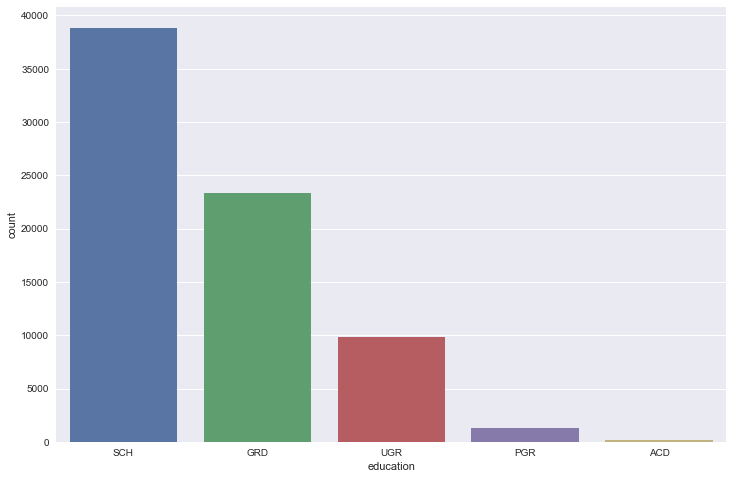

In [10]:
sns.countplot(train['education'])

<AxesSubplot:xlabel='education', ylabel='count'>

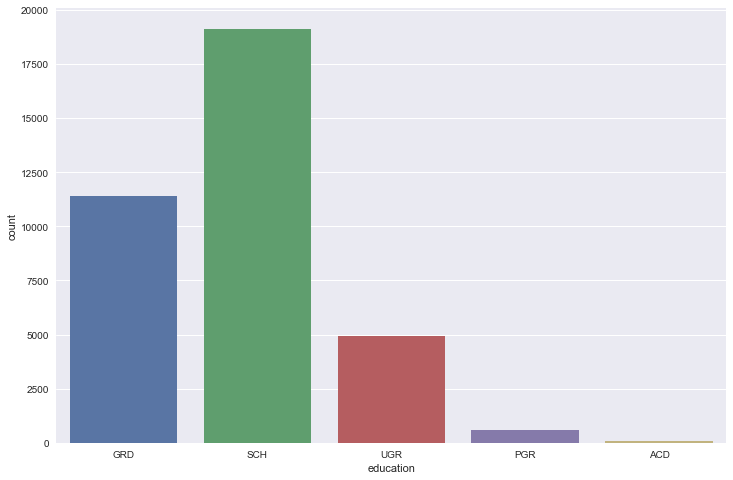

In [11]:
sns.countplot(test['education'])

По распределениям видно, что наиболее частое значение признака это 'SCH', а значит этим значением можно заполнить пропуски.
Это не должно повлиять на результат, т.к. количество пропусков незначительно в сравнении с общим количеством данных. 

# Предобработка данных

Разобьем данные по типам(исключая client_id, так как он здесь не нужен, и app_date на основе которого мы создадим новый признак)

In [12]:
num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income', 'score_bki', 'region_rating']

cat_cols = ['education', 'work_address', 'home_address', 'sna', 'first_time']

bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

Для начала рассмотрим признак 'education', т.к. имеются пропуски.

## education

In [13]:
train['education'].fillna('SCH', inplace=True)
test['education'].fillna('SCH', inplace=True)

Проверим

In [14]:
print('train\n',train.isnull().sum(),'\n\ntest\n', test.isnull().sum())

train
 client_id           0
app_date            0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
score_bki           0
bki_request_cnt     0
region_rating       0
home_address        0
work_address        0
income              0
sna                 0
first_time          0
foreign_passport    0
default             0
dtype: int64 

test
 client_id           0
app_date            0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
score_bki           0
bki_request_cnt     0
region_rating       0
home_address        0
work_address        0
income              0
sna                 0
first_time          0
foreign_passport    0
dtype: int64


Затем app_date, т.к. это дата и с помощью этого признака можно создать новый признак.

## app_date

In [15]:
train.app_date.head()

0    01FEB2014
1    12MAR2014
2    01FEB2014
3    23JAN2014
4    18APR2014
Name: app_date, dtype: object

Приведем признак к формату datatime

In [16]:
train['app_date'] = train['app_date'].apply(lambda x: datetime.strptime(x, '%d%b%Y'))

In [17]:
test['app_date'] = test['app_date'].apply(lambda x: datetime.strptime(x, '%d%b%Y'))

Создадим новый признак - количество дней прошедшее от даты подачи заявки до сегодняшнего дня

In [18]:
today = datetime.now()

train['days'] = (today - train.app_date).dt.days
test['days'] = (today - test.app_date).dt.days

num_cols.append('days')

In [19]:
train.head()

client_id   app_date education sex  age car car_type  decline_app_cnt  \
0      25905 2014-02-01       SCH   M   62   Y        Y                0   
1      63161 2014-03-12       SCH   F   59   N        N                0   
2      25887 2014-02-01       SCH   M   25   Y        N                2   
3      16222 2014-01-23       SCH   F   53   N        N                0   
4     101655 2014-04-18       GRD   M   48   N        N                0   

   good_work  score_bki  bki_request_cnt  region_rating  home_address  \
0          0  -2.008753                1             50             1   
1          0  -1.532276                3             50             2   
2          0  -1.408142                1             80             1   
3          0  -2.057471                2             50             2   
4          1  -1.244723                1             60             2   

   work_address  income  sna  first_time foreign_passport  default  days  
0             2   18000    4           1                N        0  2643  
1             3   19000    4           1                N        0  2604  
2             2   30000    1           4                Y        0  2643  
3             3   10000    1           3                N        0  2652  
4             3   30000    1           4                Y        0  2567

In [20]:
test.head()

client_id   app_date education sex  age car car_type  decline_app_cnt  \
0      74835 2014-03-22       GRD   M   29   Y        Y                0   
1      17527 2014-01-24       SCH   F   39   N        N                5   
2      75683 2014-03-23       UGR   M   50   Y        Y                0   
3      26883 2014-02-03       SCH   M   56   N        N                0   
4      28862 2014-02-04       GRD   F   38   N        N                0   

   good_work  score_bki  bki_request_cnt  region_rating  home_address  \
0          0  -2.271884                3             50             1   
1          0  -1.504999                2             50             1   
2          0  -1.691339                1             50             1   
3          0  -2.374182                1             40             1   
4          0  -2.487502                0             80             2   

   work_address  income  sna  first_time foreign_passport  days  
0             2   50000    1           4                N  2594  
1             2    5000    4           3                N  2651  
2             2   30000    1           3                Y  2593  
3             2   17000    1           3                N  2641  
4             3  120000    1           3                N  2640

## default

Рассмотрим целевую переменную 'default'

In [21]:
train['default'].value_counts()

0    64427
1     9372
Name: default, dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

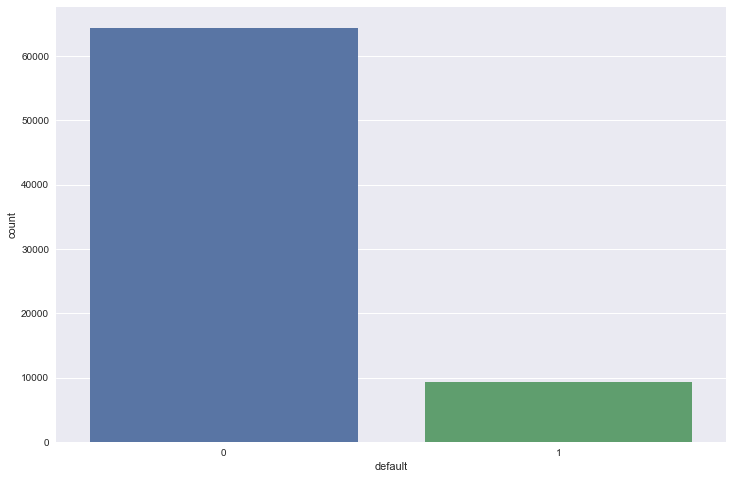

In [22]:
sns.countplot(x='default', data=train)

Признак распределён неравномерно, а значит используем oversampling, чтобы устранить неравномерность.

In [23]:
train_0 = train.query('default == 0')
train_1 = train.query('default == 1')
ratio = int(len(train_0)/len(train_1))
for i in range(ratio):
    train = train.append(train_1).reset_index(drop=True)

In [24]:
train['default'].value_counts()

1    65604
0    64427
Name: default, dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

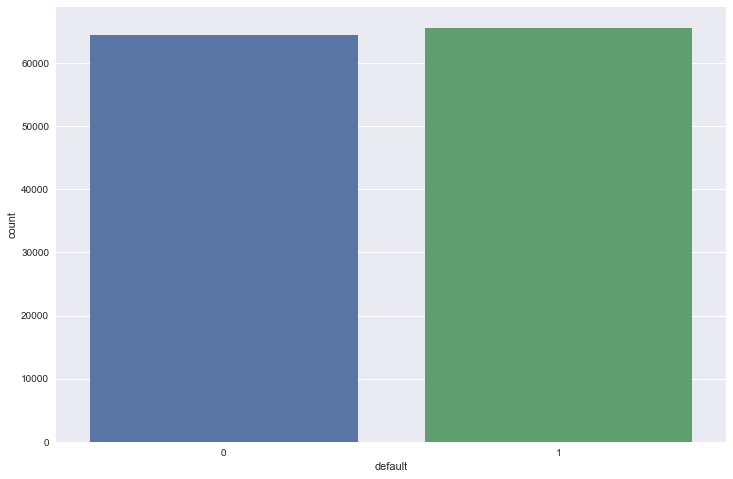

In [25]:
sns.countplot(x='default', data=train)

# Числовые признаки

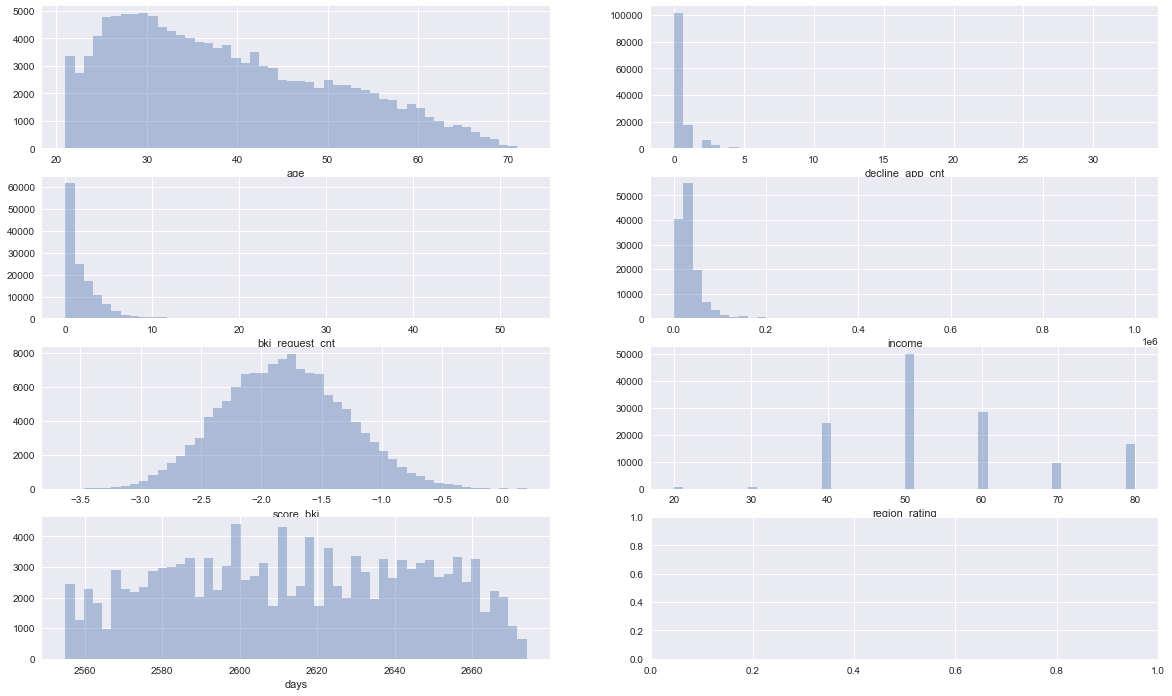

In [26]:
fig, axes = plt.subplots(4, 2, figsize=(20,12))
for i,col in enumerate(num_cols):
    sns.distplot(train[col], kde=False, ax=axes.flat[i])

Распределение некоторых признаков смещено. Посмотрим что будет, если прологорифмировать их.

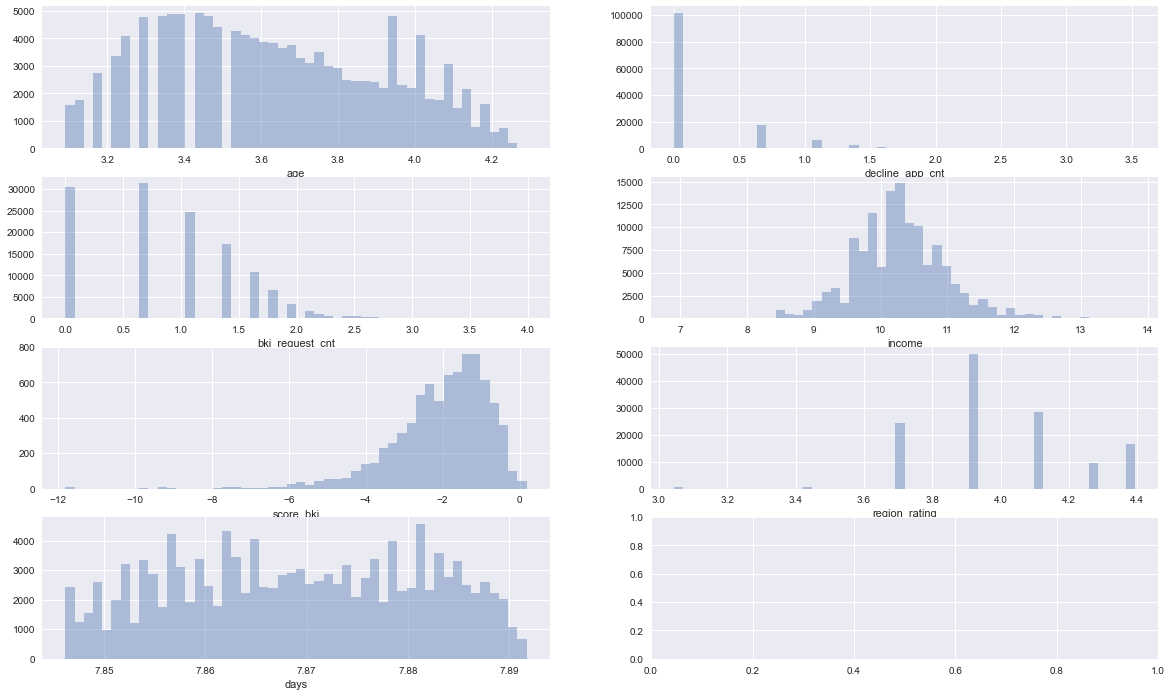

In [27]:
fig, axes = plt.subplots(4, 2, figsize=(20,12))
for i,col in enumerate(num_cols):
    sns.distplot(np.log(train[col]+1), kde=False, ax=axes.flat[i])

Для переменных 'age', 'decline_app_cnt', 'bki_request_cnt', 'income' распределение логарифов ближе к нормальному. Для этох признаков заменим значения на логарифмы. Переменные 'score_bki', 'region_rating', 'days' оставим без изменений.

In [28]:
for i in ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']:
    train[i] = np.log(train[i] + 1)
    test[i] = np.log(test[i] + 1)

Проверим

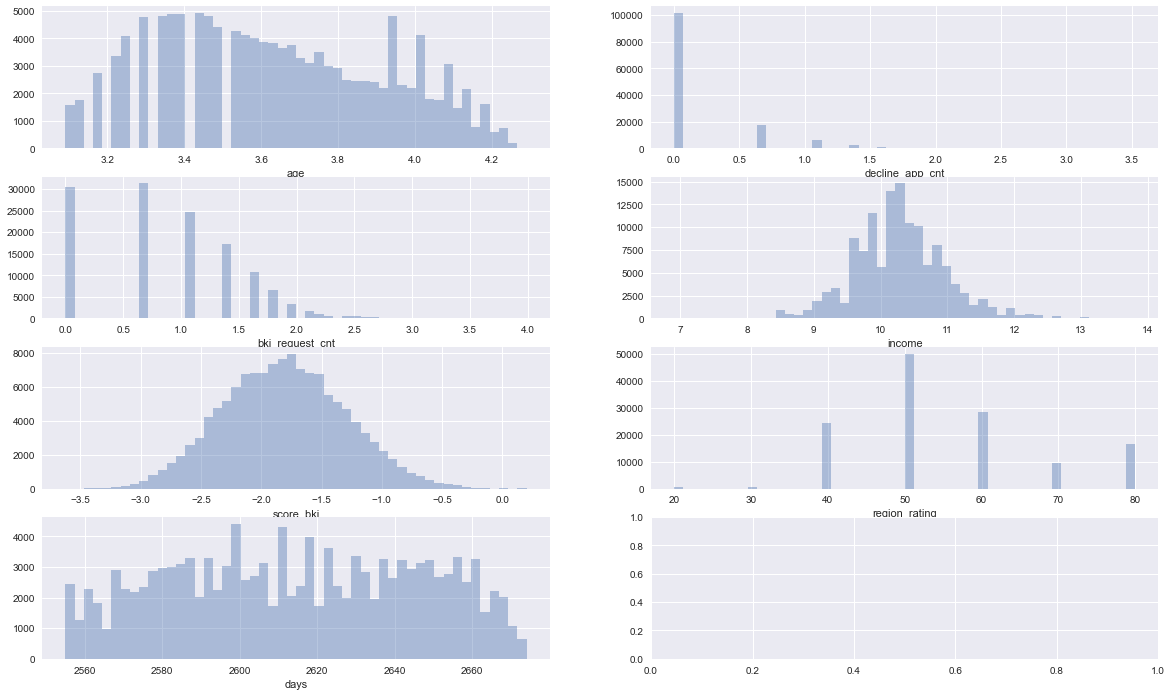

In [29]:
fig, axes = plt.subplots(4, 2, figsize=(20,12))
for i,col in enumerate(num_cols):
    sns.distplot(train[col], kde=False, ax=axes.flat[i])

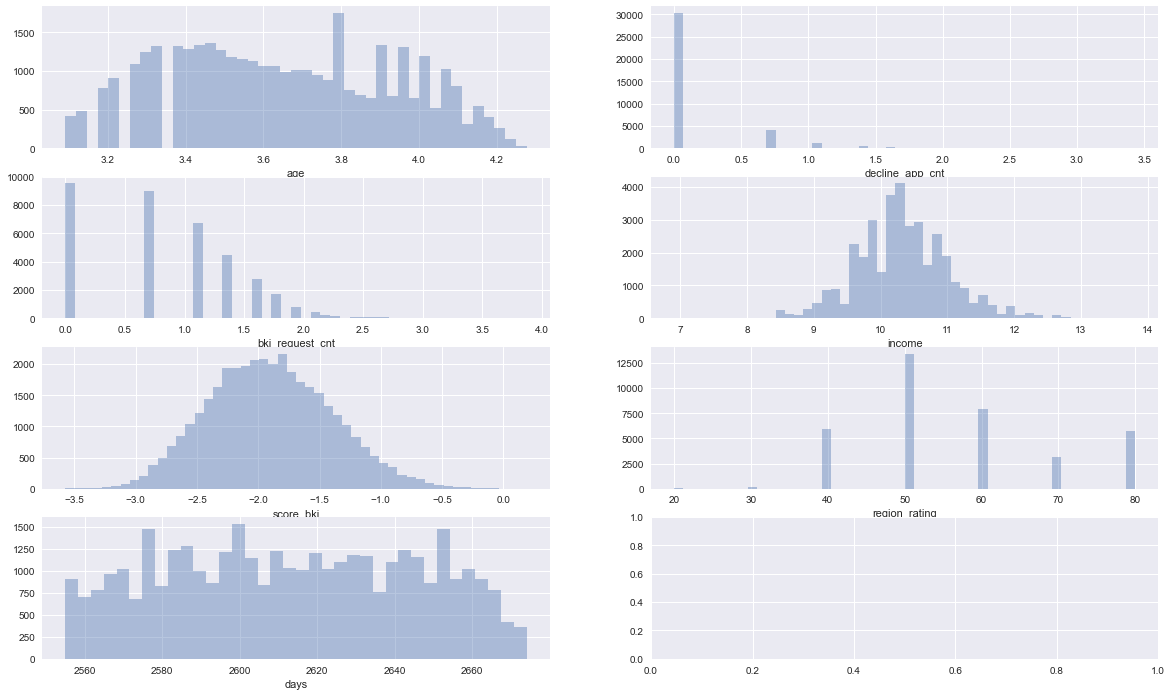

In [30]:
fig, axes = plt.subplots(4, 2, figsize=(20,12))
for i,col in enumerate(num_cols):
    sns.distplot(test[col], kde=False, ax=axes.flat[i])

## Построим boxplot для числовых признаков

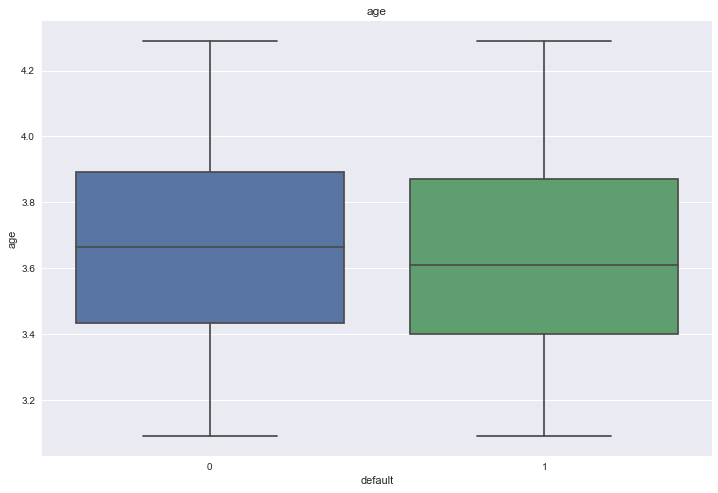

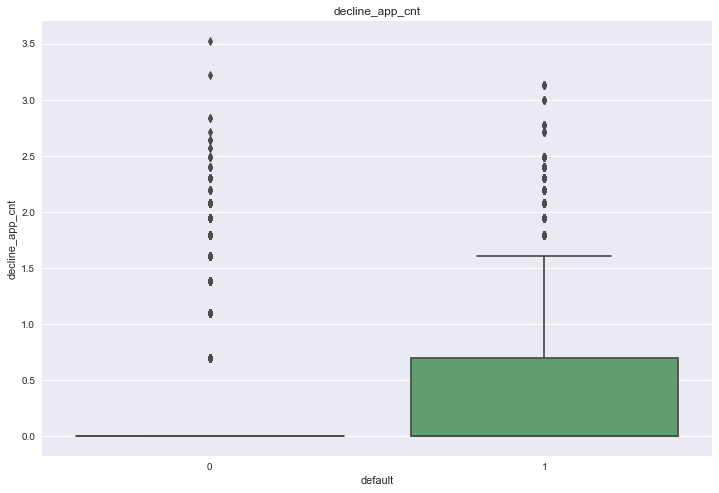

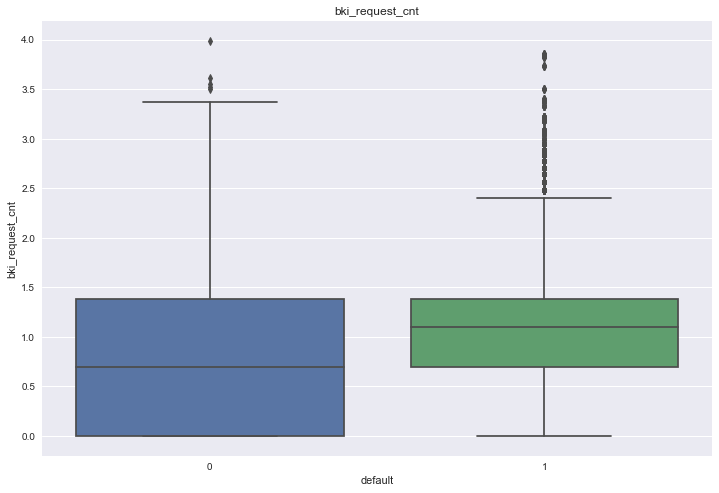

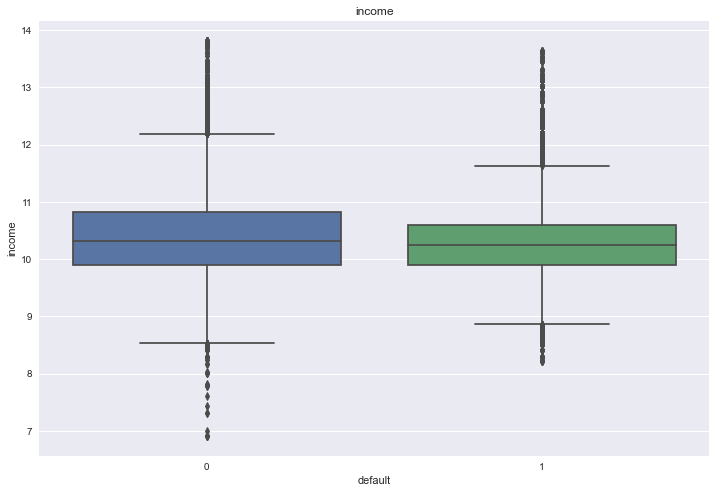

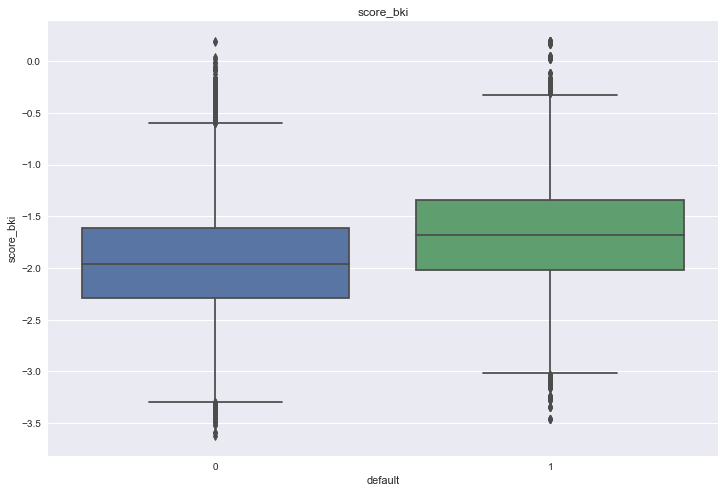

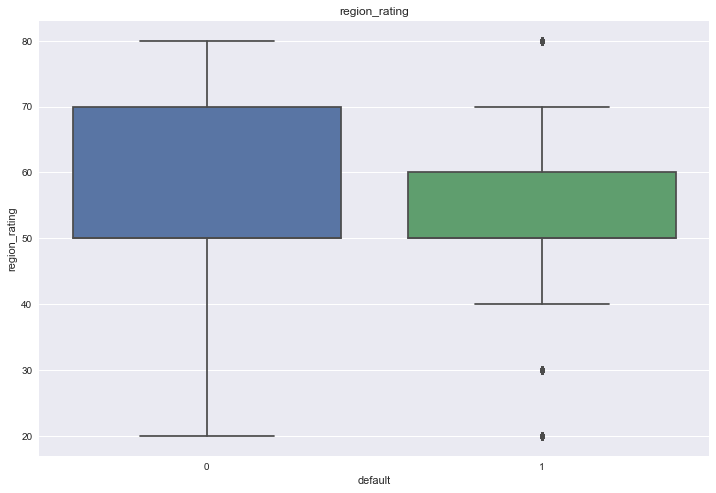

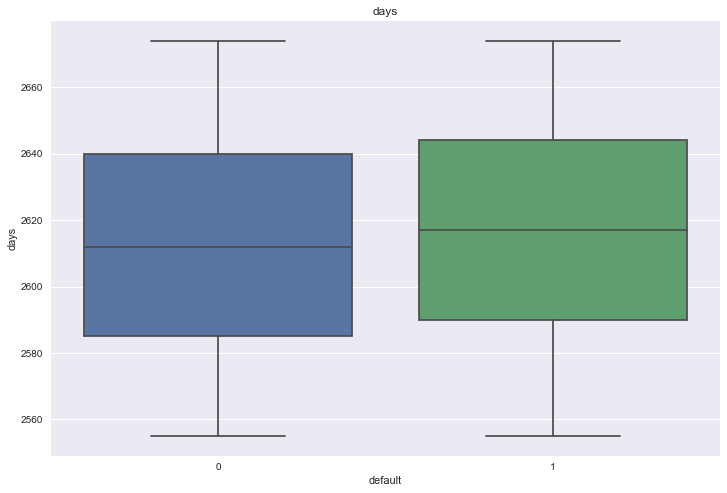

In [31]:
for column in num_cols:
    plt.figure()
    sns.boxplot(x=train['default'], y=train[column])
    plt.title(column)
    plt.show()

Можно сделать вывод, что дефолтные клиенты в среднем младше, имеют большое количество отмененных заявок, имеют больше запросов в БКИ, имеют более высокую оценку в БКИ, имеют доход ниже, имеют более низкий рейтинг региона и количество дней с подачи первой заявки чуть больше.

## Оценим корреляцию Пирсона для числовых признаков

<AxesSubplot:>

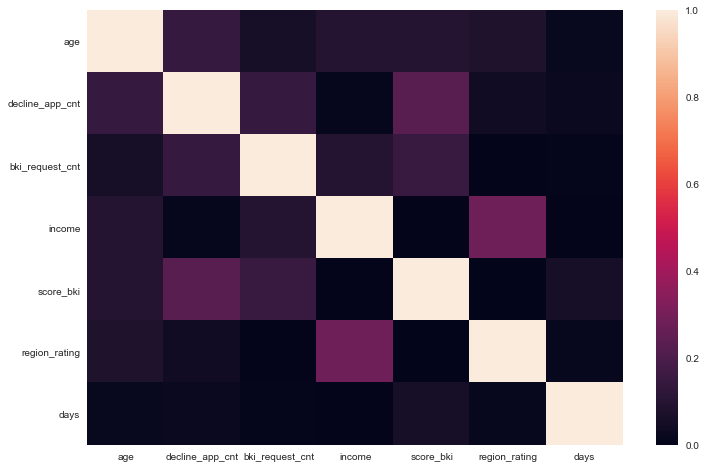

In [32]:
sns.heatmap(train[num_cols].corr().abs(), vmin=0, vmax=1)

Высокой корреляции между признаками не наблюдается

## Оценим значимость числовых признаков

<AxesSubplot:>

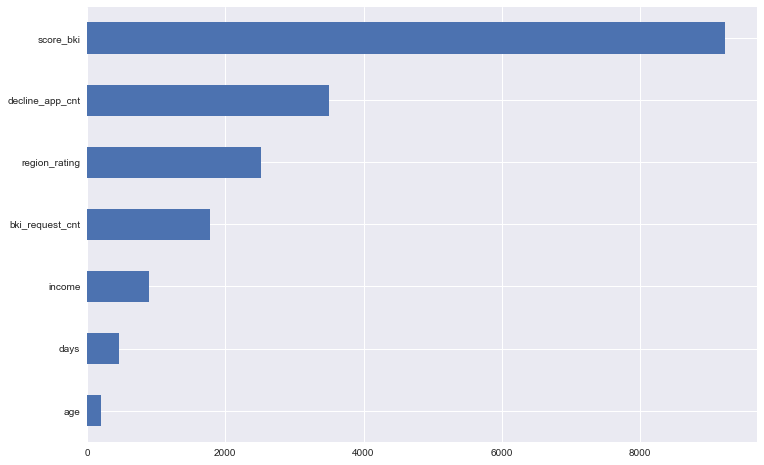

In [33]:
imp_num = Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Самым значимым из числовых признаков является score_bki

# Бинарные признаки

In [34]:
train[bin_cols]

sex car car_type  good_work foreign_passport
0        M   Y        Y          0                N
1        F   N        N          0                N
2        M   Y        N          0                Y
3        F   N        N          0                N
4        M   N        N          1                Y
...     ..  ..      ...        ...              ...
130026   M   N        N          0                N
130027   F   N        N          0                N
130028   M   Y        Y          0                N
130029   F   N        N          0                N
130030   F   N        N          1                N

[130031 rows x 5 columns]

Преобразуем в числовой формат

In [35]:
label_encoder = LabelEncoder()

for column in bin_cols:
    train[column] = label_encoder.fit_transform(train[column])
    test[column] = label_encoder.fit_transform(test[column])

Убедимся в пребразовании

In [36]:
train[bin_cols]

sex  car  car_type  good_work  foreign_passport
0         1    1         1          0                 0
1         0    0         0          0                 0
2         1    1         0          0                 1
3         0    0         0          0                 0
4         1    0         0          1                 1
...     ...  ...       ...        ...               ...
130026    1    0         0          0                 0
130027    0    0         0          0                 0
130028    1    1         1          0                 0
130029    0    0         0          0                 0
130030    0    0         0          1                 0

[130031 rows x 5 columns]

## Оценим корреляцию Пирсона для бинарных признаков

<AxesSubplot:>

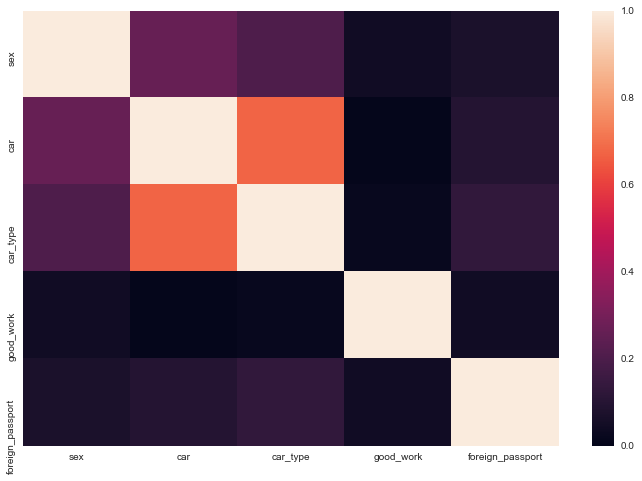

In [37]:
sns.heatmap(train[bin_cols].corr().abs(), vmin=0, vmax=1)

Признаки 'car' и 'car_type' сильно коррелируют между собой, необходимо оставить один.

## Оценим значимость бинарных признаков

<AxesSubplot:>

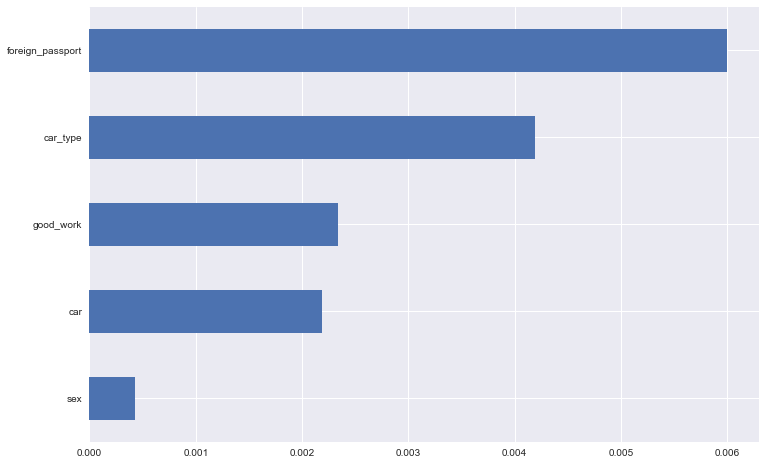

In [38]:
imp_num = Series(mutual_info_classif(train[bin_cols], train['default'], discrete_features =True), index = bin_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Самым значимым из бинарных признаков является foreign_passport

Оставим только необходимые признаки

In [39]:
bin_cols = ['sex', 'car_type', 'good_work', 'foreign_passport']

# Категориальные признаки

Для начала преобразуем 'education' в числовой формат

In [40]:
label_encoder = LabelEncoder()
train['education'] = pd.Series(label_encoder.fit_transform(train['education']))
test['education'] = pd.Series(label_encoder.fit_transform(test['education']))

In [41]:
train['education']

0         3
1         3
2         3
3         3
4         1
         ..
130026    4
130027    3
130028    3
130029    1
130030    3
Name: education, Length: 130031, dtype: int32

## Оценим корреляцию Пирсона для категориальных признаков

<AxesSubplot:>

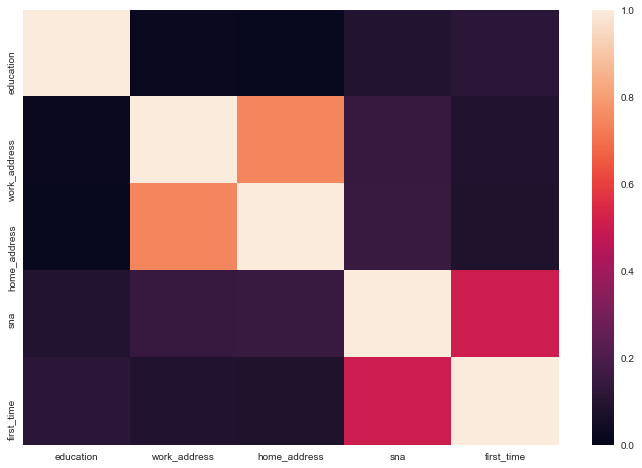

In [42]:
sns.heatmap(train[cat_cols].corr().abs(), vmin=0, vmax=1)

Присутствует скоррелированность признаков 'home_address' и 'work_address', а также 'sna' и 'first_time', но во втором случае скоррелированность недостаточна для отсеивания одного из них.

## Оценим значимость бинарных признаков

<AxesSubplot:>

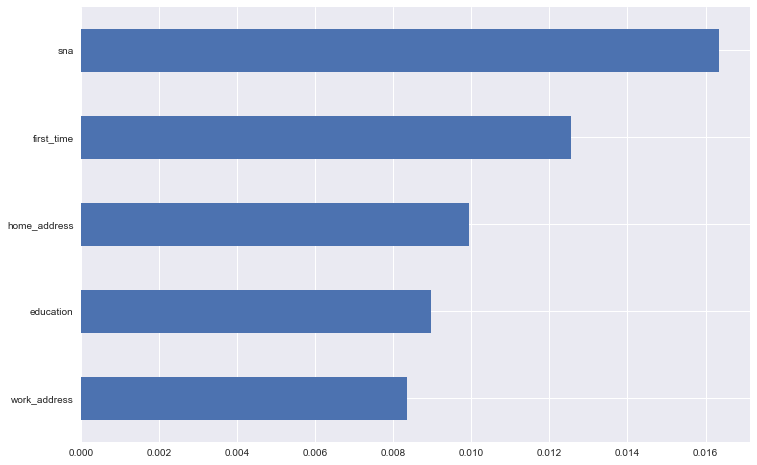

In [43]:
imp_cat = Series(mutual_info_classif(train[cat_cols], train['default'], discrete_features =True), index = cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Самым значимым из категориальных признаков является sna

Оставим только необходимые признаки

In [44]:
cat_cols = ['education', 'home_address', 'sna', 'first_time']

# Подготовка данных

Воспользуемся методом One-Hot Encoding для преобразования категориальных признаков

In [45]:
X_cat = OneHotEncoder(sparse = False).fit_transform(train[cat_cols].values)
Y_cat = OneHotEncoder(sparse = False).fit_transform(test[cat_cols].values)

Воспользуемся методом StandardScaler для преобразования числовых признаков

In [46]:
X_num = StandardScaler().fit_transform(train[num_cols].values)
Y_num = StandardScaler().fit_transform(test[num_cols].values)

Объеденим признаки и выделим целевую переменную

In [47]:
X = np.hstack([X_num, train[bin_cols].values, X_cat])
Y = train['default'].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

## Поиск опримальных значений гиперпараметров

In [49]:
# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

Лучшее Penalty: l2
Лучшее C: 1.0


## Обучение модели

In [50]:
model = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

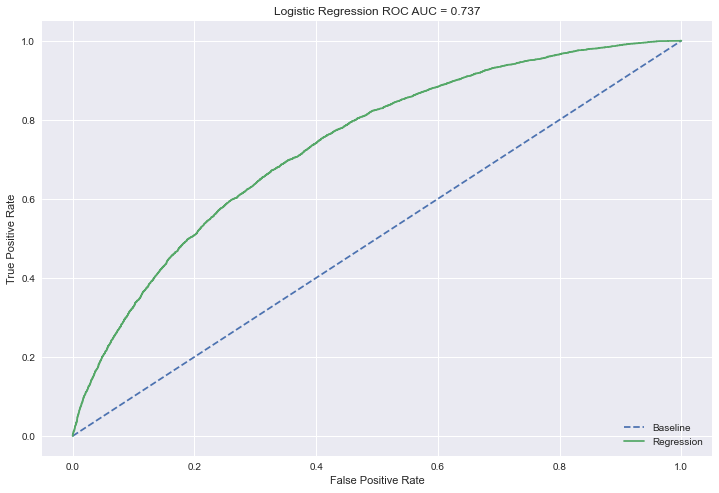

In [51]:
probs = model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [52]:
Y_predicted = model.predict(X_test)

In [53]:
print('accuracy_score:',accuracy_score(y_test, Y_predicted))
print('precision_score:',precision_score(y_test, Y_predicted))
print('recall_score:',recall_score(y_test, Y_predicted))
print('f1_score:',f1_score(y_test, Y_predicted))

accuracy_score: 0.671665320875149
precision_score: 0.6696949049890226
recall_score: 0.6793119336507449
f1_score: 0.6744691395676872


In [54]:
# confusion matrix
cm = confusion_matrix(y_test, Y_predicted)
cm

array([[8622, 4363],
       [4176, 8846]], dtype=int64)

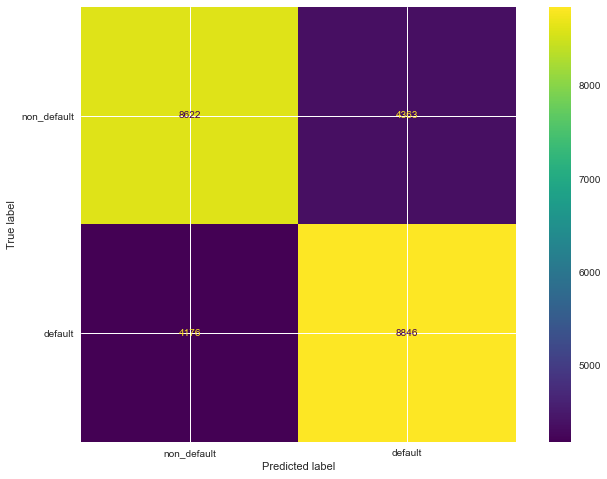

In [55]:
ConfusionMatrixDisplay(cm, display_labels=['non_default','default']).plot()

## Выкладываем результат на kaggle

In [56]:
id_test = test['client_id']
test = np.hstack([Y_num, test[bin_cols].values, Y_cat])

In [57]:
model = LogisticRegression(penalty = 'l2', C=1.0, max_iter=1000)
model.fit(X, Y)
probs = model.predict_proba(test)
probs = probs[:,1]

In [58]:
my_submission = pd.DataFrame({'client_id': id_test,
                              'default': probs})
my_submission.to_csv('submission.csv', index=False)

my_submission.head(10)

client_id   default
0      74835  0.227244
1      17527  0.840386
2      75683  0.339514
3      26883  0.440020
4      28862  0.170823
5      99881  0.630261
6      26630  0.818109
7      79934  0.173460
8      16605  0.171320
9     105449  0.181977